In [7]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import activitiesdf
from datetime import timedelta

In [3]:
activities = activitiesdf.read_csv('sweden').set_index(['userid', 'region', 'tweetid'])

In [13]:
activities['createdat']

userid              region  tweetid           
5616                0       306814580301119488    2013-02-27 18:14:30+01:00
                            596331871241379840    2015-05-07 17:12:52+02:00
                            623057810864111616    2015-07-20 11:12:12+02:00
                            679673567416565760    2015-12-23 15:43:00+01:00
                            757647103011262465    2016-07-25 20:42:00+02:00
                                                            ...            
806822309478727680  7       815619064613609472    2017-01-01 19:01:53+01:00
                            815835652486938624    2017-01-02 09:22:31+01:00
                            815937364736380928    2017-01-02 16:06:41+01:00
                    8       816003760006668288    2017-01-02 20:30:31+01:00
                    9       817472176437608448    2017-01-06 21:45:29+01:00
Name: createdat, Length: 1276015, dtype: object

In [15]:
activities['createdat'] = pd.to_datetime(activities.createdat, format="%Y-%m-%d %H:%M:%S%z")

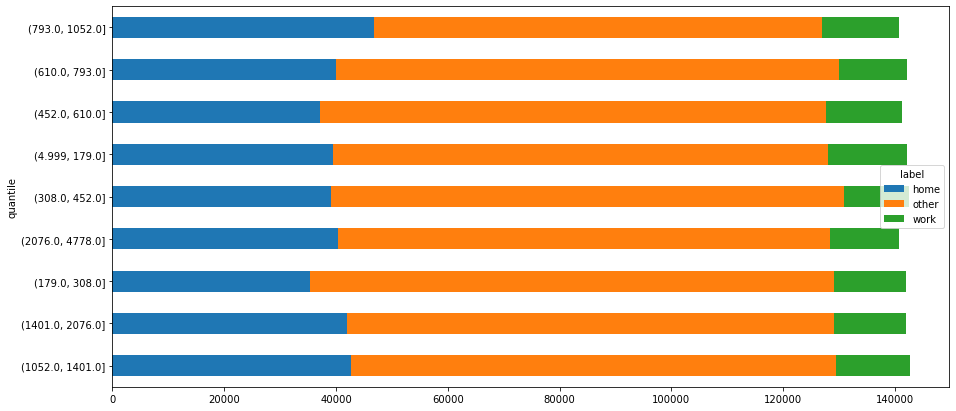

In [6]:
activitiesdf.plot_label_distrib(activities)

In [9]:
u = activities.loc[5616].reset_index()
words = []
current_word = []
prev_row = None
for _, row in u.iterrows():
    if prev_row is None:
        current_word.append(str(row['region'] if row['label'] == "other" else row['label']))
    else:
        if row['createdat'] - prev_row['createdat'] < timedelta(hours=8):
            if str(row['region'] if row['label'] == "other" else row['label']) != current_word[len(current_word) - 1]:
                current_word.append(str(row['region'] if row['label'] == "other" else row['label']))
        else:
            words.append(' '.join(current_word))
            current_word = [str(row['region'] if row['label'] == "other" else row['label'])]
    prev_row = row
words.append(' '.join(current_word))
from sklearn.feature_extraction.text import CountVectorizer
vct = CountVectorizer(analyzer='word', ngram_range=(2,2), min_df=0)
freqs = vct.fit_transform(words).toarray().sum(axis=0)
bigrams = vct.get_feature_names()
seqdf = pandas.DataFrame({
    'count': freqs,
    'bigram': bigrams,
})
seqdf['origin'] = seqdf['bigram'].apply(lambda x: x.split(' ')[0])
seqdf['destination']= seqdf['bigram'].apply(lambda x: x.split(' ')[1])
seqdf2 = seqdf.copy(deep=True)
def rev(x):
    xs = x.split(' ')
    return xs[1] + " " + xs[0]
seqdf2['bigram'] = seqdf2['bigram'].apply(rev)
seqdf3 = seqdf.merge(seqdf2, on='bigram', how='left')
seqdf3['count_y'] = seqdf3['count_y'].fillna(0)
seqdf3['count'] = seqdf3['count_x'] + seqdf3['count_y']
seqdf3[seqdf3['count_x'] != seqdf3['count_y']]
seqdf3[(seqdf3['origin_x'] == 'home') | (seqdf3['destination_x'] == 'home') ].sort_values('count', ascending=False).set_index('bigram').head(10).plot(kind='barh')

TypeError: unsupported operand type(s) for -: 'str' and 'str'